## Wine Quality (Linear Regression)
This notebook builds a linear regression model to predict wine quality using the UCI Wine Quality dataset.  
Steps: load data → EDA → train/test split → train model → evaluate → (then save/export for deployment).

In [1]:
# Core
import numpy as np
import pandas as pd

# Viz
import seaborn as sns
import matplotlib.pyplot as plt

# Data
from ucimlrepo import fetch_ucirepo

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset
Fetch the combined Wine Quality dataset (red + white) from UCI and assemble a single DataFrame.

In [2]:
wine_quality = fetch_ucirepo(id=186)  # UCI Wine Quality
X = wine_quality.data.features
y = wine_quality.data.targets
df = pd.concat([X, y], axis=1)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Basic Data Checks
Confirm dimensions, missingness, and summary statistics to understand ranges and potential issues.

In [3]:
print("Dataset shape:", df.shape)
print("\nMissing values per column:\n", df.isnull().sum())
df.describe()

Dataset shape: (6497, 12)

Missing values per column:
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Correlation Heatmap
Inspect linear relationships between features and the target `quality`.

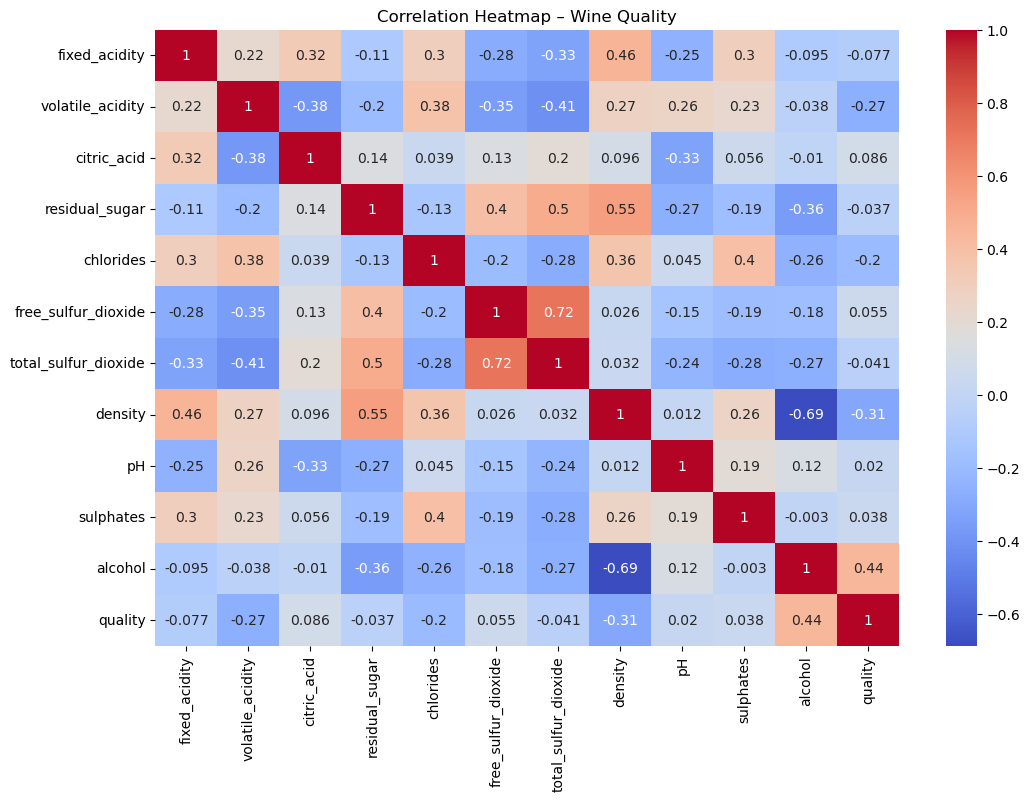

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap – Wine Quality")
plt.show()

## Train/Test Split & Model Training
Use an 80/20 split and train a scikit-learn `LinearRegression` model.

In [5]:
# Features / target
X = df.drop(columns=["quality"])
y = df["quality"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Train
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Evaluate Model
Report MSE, RMSE, and R² on the hold-out test set.

In [6]:
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.5467
Root Mean Squared Error: 0.7394
R² Score: 0.2598


## Save Trained Model (Next Step)
Once happy with results, persist the model for Flask/Docker/Heroku deployment.

In [7]:
import joblib
joblib.dump(lr, "wine_quality_model.pkl")

['wine_quality_model.pkl']